## 使用minist进行分类学习


In [1]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "classification"

def save_fig(fig_id, tight_layout=True):
    path = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID, fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

In [2]:
##这一步能否成功，可能和网络有一定的关系吧，而且这个好像还不能直接在python3上面直接运行，必须有上面的那些
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original',data_home =r'C:\Users\Administrator\MachineLearning\datasets\minist_data')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([0., 0., 0., ..., 9., 9., 9.])}

In [3]:
x,y = mnist['data'],mnist['target']
x.shape

(70000, 784)

In [4]:
y.shape

(70000,)

从上面这个可以得知x是一个特征，而y是标签

In [5]:
28*28

784

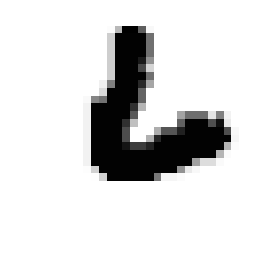

In [6]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit = x[38001]
some_digit_image = some_digit.reshape(28,28)
plt.imshow(some_digit_image,cmap = matplotlib.cm.binary,
           interpolation = 'nearest')
plt.axis('off')
plt.show()

In [7]:
#定义一个函数来展示其能够将数据变成图片
def plot_digit(data):
    image = data.reshape(28,28)
    plt.imshow(image,cmap = matplotlib.cm.binary,
              interpolation = 'nearest')
    plt.axis('off')

In [8]:
x_train, x_test, y_train, y_test = x[:60000], x[60000:], y[:60000], y[60000:]

In [9]:
import numpy as np

shuffle_index = np.random.permutation(60000)
x_train, y_train = x_train[shuffle_index], y_train[shuffle_index]

### 训练一个二分类器
现在我们简化一下问题，只尝试去识别一个数字，比如说：数字5

In [10]:
y_train_5 = (y_train==5)
y_test_5 = (y_test ==5)

使用随机梯度下降分类器SGD，进行处理

In [11]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)#为了能够重现结果，你需要在此固定参数
sgd_clf.fit(x_train, y_train_5)

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=42, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [12]:
sgd_clf.predict([some_digit])#这边为什么要传入一个列表？？

array([False])

In [13]:
print(some_digit)

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   3  71 254 255 161   7
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0  49 252 252 252 252 143   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0  49 252 252 252
 252 143   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0  49 252 252 252 252 143   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  49 252
 252 252 229 109   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0  49 252 252 252 183  42   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
  49 252 252 252 252 143   0   0   0   0   0   0   

## 对性能的评估

### 使用交叉验证测量准确性

In [14]:
from sklearn.model_selection import StratifiedKFold
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits =3,random_state =42)
#将其切割成三份，而且参数为42
for train_index,test_index in skfolds.split(x_train,y_train_5):
    clone_clf = clone(sgd_clf)#将这个模型进行克隆
    x_train_folds = x_train[train_index]
    y_train_folds = (y_train_5[train_index])
    x_test_folds = x_train[test_index]
    y_test_folds = (y_train_5[test_index])
    
    clone_clf.fit(x_train_folds,y_train_folds)
    y_pred = clone_clf.predict(x_test_folds)
    n_correct =sum(y_pred == y_test_folds)
    print(n_correct/len(y_pred))

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.9502


D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96565


D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


0.96495


### 简单使用sklearn里面的模块进行交叉验证

In [15]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf,x_train,y_train_5,cv=3,scoring='accuracy')

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochas

array([0.9502 , 0.96565, 0.96495])

哇！在交叉验证上有大于 95% 的精度（accuracy）？这看起来很令人吃惊。先别高兴，让我们来看一个非常笨的分类器去分类，看看其在“非 5”这个类上的表现。

In [16]:
from sklearn.base import BaseEstimator
class Never5Classifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [17]:
never_5_clf = Never5Classifier()

In [18]:
cross_val_score(never_5_clf,x_train,y_train_5,cv=3,scoring='accuracy')

array([0.909  , 0.90715, 0.9128 ])

没错，这个笨的分类器也有 90% 的精度。这是因为只有 10% 的图片是数字 5，所以你总是猜测某张图片不是 5，你也会有90%的可能性是对的。

这证明了为什么精度通常来说不是一个好的性能度量指标，特别是当你处理有偏差的数据集，比方说其中一些类比其他类频繁得多。

### 混淆矩阵

对于分类器来说，一个好得多的性能评估指标是混淆矩阵。大体思路是：输出类别是A被分类成类别B的次数

- 为了计算混淆矩阵，首先你需要有一系列的预测值，这样你才能将预测值与真实值做比较

In [19]:
from sklearn.model_selection import cross_val_predict
y_train_pred = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3)
#这个返回了每个测试折的预测值

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochas

In [20]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_5,y_train_pred)

array([[53272,  1307],
       [ 1077,  4344]], dtype=int64)

混淆矩阵中的每一行表示一个实际的类，而每一列表示一个预测的类。该矩阵的第一行认为”非5“中的53343张被正确归类为”非5“，而其余1307张被错误归类为”是5“。一个完美的分类器只有真反例和真正例，所以混淆矩阵的非零值仅在其主对角线

### 准确率与召回率

- 准确率$TP/(TP+FP)$其中TP是真正例的数目，FP是假正例的数目。
- 召回率$TP/(TP+FN)$其中TP是真正例的数目，FN是假反例的数目。

In [21]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_5,y_train_pred)


0.7687135020350381

In [22]:
recall_score(y_train_5,y_train_pred)

0.801328168234643

通常结合准确率和召回率会更加方便，这个值叫做F1值，特别是当你需要一个简单的方法来比较两个分类器的优劣的时候，即准备率与召回率的调和平均数
为了计算F1值，简单调用f1_score()

In [23]:
from sklearn.metrics import f1_score
f1_score(y_train_5,y_train_pred)

0.7846820809248555

F1 支持那些有着相近准确率和召回率的分类器。这不会总是你想要的。有的场景你会绝大程度地关心准确率，而另外一些场景你会更关心召回率。

举例子，如果你训练一个分类器去检测视频是否适合儿童观看，你会倾向选择那种即便拒绝了很多好视频、但保证所保留的视频都是好（高准确率）的分类器，

而不是那种高召回率、但让坏视频混入的分类器（这种情况下你或许想增加人工去检测分类器选择出来的视频）。另一方面，加入你训练一个分类器去检测监控图像当中的窃贼，有着 30% 准确率、99% 召回率的分类器或许是合适的（当然，警卫会得到一些错误的报警，但是几乎所有的窃贼都会被抓到）。

### 准确率与召回率之间的折衷

首先我们需要先了解SGDClassifier是如何做分类决策的，它根据决策函数计算分类，如果这个分类大于一个阈值，它会将样例分配给正例，否则将其分配给反例。

scikit_learn 不让你直接设置阈值，但是它给你提供了一个设置决策分数的方法，这个决策分数可以用来产生预测。通过调用decision_function()方法。这个方法返回每一个样例的分数值，然后基于这个分数值，使用你想要的任何阈值做出预测。

In [24]:
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-405475.54109312])

In [25]:
threshold =0

In [26]:
y_some_digit_pred = (y_scores>threshold)

In [27]:
y_some_digit_pred

array([False])

阈值的提高会降低如回率，首先你需要再次使用cross_val_predict()得到每一个样例的分数值，但是这一次指定返回一个决策分数，而不是预测值。

In [28]:
y_scores = cross_val_predict(sgd_clf,x_train,y_train_5,cv=3,method = 'decision_function')

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
D:\anaconda\lib\site-packages\sklearn\linear_model\stochas

In [29]:
from sklearn.metrics import precision_recall_curve
precisions,recalls,thresholds = precision_recall_curve(y_train_5,y_scores)

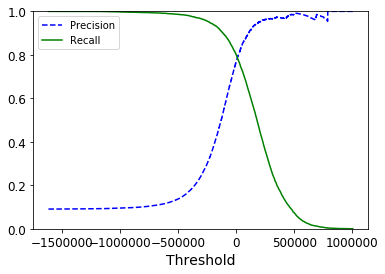

In [30]:
def plot_pre_recall_vs_threshold(precisions,recalls,thresholds):
    plt.plot(thresholds,precisions[:-1],"b--",label='Precision')
    plt.plot(thresholds,recalls[:-1],'g-',label='Recall')
    plt.xlabel('Threshold')
    plt.legend(loc='upper left')
    plt.ylim([0,1])
plot_pre_recall_vs_threshold(precisions,recalls,thresholds)
plt.show()

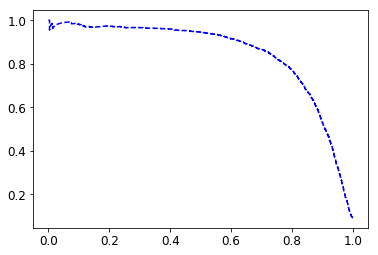

In [31]:
plt.plot(recalls[:-1],precisions[:-1],'b--'
        )
plt.show()

我们假设你决定达到 90% 的准确率。你查阅第一幅图（放大一些），在 70000 附近找到一个阈值。为了作出预测（目前为止只在训练集上预测），你可以运行以下代码，而不是运行分类器的predict()方法。

In [32]:
y_train_pred_90 = (y_scores > 70000)

In [33]:
y_train_pred_90

array([False, False, False, ..., False, False, False])

In [34]:
precision_score(y_train_5, y_train_pred_90)

0.8659205116491548

In [35]:
recall_score(y_train_5, y_train_pred_90)

0.6993174691016417

### ROC曲线
受试工作者特征（ROC曲线）是另一个二分类器常用的工具。
- ROC是真正例率（true positive rate,也称召回率）[TPR]对假正例率（false positive rate）[FPR]的曲线。FPR是反例被错误分成正例的比率。它等于1-真反例率。

In [36]:
from sklearn.metrics import roc_curve
fpr,tpr,thresholds = roc_curve(y_train_5,y_scores)
# print(fpr,tpr)

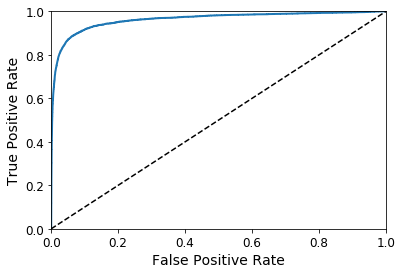

In [37]:
def plot_roc_curve(fpr,tpr,label=None):
    plt.plot(fpr,tpr,linewidth=2,label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
plot_roc_curve(fpr,tpr)
plt.show()

这里同样存在折衷的问题：召回率（TPR）越高，分类器就会产生越多的假正例（FPR）。图中的点线是一个完全随机的分类器生成的ROC曲线；一个好的分类器的ROC曲线应该尽可能远离这条线（即向左上角方向靠拢）

###### 一个比较分类器之间优劣的方法是：测量ROC曲线下的面积（AUC）。一个完美的分类器的ROC，AUC等于1，而一个纯随机分类器的ROC，AUC等于0.5. Scikit-Learn提供了一个函数来计算ROC AUC：


In [38]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_5,y_scores)

0.9624496555967155

一个笨拙的使用ROC曲线和PR曲线的规则是，当你关注假正例多于假反例的时候，其他情况下使用ROC曲线。


举个例子：回顾前面的ROC曲线和ROC AUC数值，你或许会认为这个分类器很棒，但是这是因为其只有少数的正例（5），而只有少数的非正例（非5）。相反，PR曲线清楚的显示出这个分类器还有很大的改善空间（PR曲线应该尽可能地靠近右上角）

### RandomForestClassifier

- 首先你需要得到训练集每个样例的数值。但由于随机森林分类器的工作方式，随机森林不提供dicision_function()方法,相反其提供了predict_proba()方法。scikit-learn分类器通常二者中的一个。
- predict_proba()方法返回一个数组，数组的每一行代表一个样例，每一列代表一个类。数组当中的值的意思是：给定一个样例属于给定类的概率。比如，70%的概率这幅图是数字5.

In [40]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, x_train, y_train_5, cv=3,
                                    method="predict_proba")

但是要画ROC曲线，你需要的是样例的分数，而不是概率。一个简单的解决方法是使用正例的概率当作样例的分类

In [41]:
y_scores_forest = y_probas_forest[:, 1] # score = proba of positive class
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_5,y_scores_forest)

D:\anaconda\lib\site-packages\matplotlib\legend.py:641: UserWarning: Unrecognized location "bottom right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


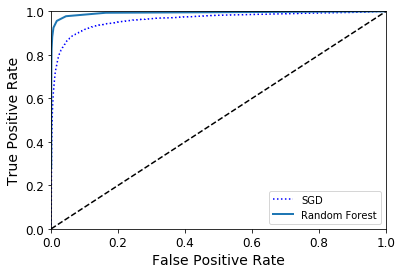

In [42]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="bottom right")
plt.show()

如你所见，RandomForestClassifier的 ROC 曲线比SGDClassifier的好得多：它更靠近左上角。所以，它的 ROC AUC 也会更大。

In [43]:
roc_auc_score(y_train_5, y_scores_forest)

0.9931243366003829

In [44]:
y_train_pred_forest = cross_val_predict(forest_clf,x_train,y_train_5,cv = 5)
precision_score(y_train_5, y_train_pred_forest)

0.9861690450054885

In [45]:
recall_score(y_train_5,y_train_pred_forest)

0.8286294041689725

## 多类分类（multiclass classification）

随机森林分类器或者朴素贝叶斯分类器，可以直接处理多类分类问题，其他一些算法（比如SVM分类器或者线性分类器）则是严格的二分类器。

两种方法来多类分类
- 训练10个二分类器，每一个对应一个数字（探测0，探测1，探测2......。。然后当你想对某张图片进行分类的时候，让每一个分类器对这个图片进行分类，选出决策分类最高的分类器，这被称为（OVA称为一对其他）
- 一个分类器用来处理0和1，一个用来处理0和2.......共需要去训练N*(N-1)/2个分类器，这叫做一对一（OVO）策略。

scikit-learn会自动地执行OVA（除了SVM分类器，它使用OVO）,首先让我们试下SGDClassifier

In [46]:
sgd_clf.fit(x_train,y_train)
sgd_clf.predict([some_digit])

D:\anaconda\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


array([6.])

上面的代码在训练集上训练了一个SGDClassifier.这个分类器处理